# Investment Assignment


## Importing libraries

We need to import some libraries to get our task done.

Panda is one of the most important and useful library in python. We are using `pandas`.

We also need to plot some graphs. For that we are importing `pyplot` from `matplotlib` package.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import chardet
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 125)



It's good to check encoding of our csvs before importing in pandas. In most of cases it may `UTF-8`, but for safety, let's check 

In [35]:
with open("companies.csv", "rb") as f: 
    encoding_company = chardet.detect(f.read(50000))

print(encoding_company)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [36]:
with open("rounds2.csv", "rb") as f: 
    encoding_rounds = chardet.detect(f.read(50000))

print(encoding_rounds)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


## Checklist 1 - Data Cleaning 1

We need to address below things - 
1. How many unique companies are present in rounds2?	
2. How many unique companies are present in companies?	                       
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 
4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 
5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [37]:
#Import companies dataset
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [38]:
#Import rounds dataset
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [47]:
#It is observed that both dataframe contains some junk characters in `company_permalink` columns. Lets remove it
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.str.lower()

rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.str.lower()


#### Let's check how many companies we have.
We can do that by checking shape of our list.This will gives length, which may contains duplicates.
We can remove duplicates by `unique()` on dataframe. This will return all unique company names. We can check shape of that also. This will helps us to identify whether we have any duplicates or not.


In [48]:
#Companies in companies dataset
companies['permalink'].unique().shape

(66368,)

In [49]:
#Comapnies in rounds
rounds2['company_permalink'].unique().shape

(66368,)

In [50]:
companies['permalink'].shape

(66368,)


We found that `companies_permalink` column gives the same count with and without `unique` function. We can say that this column can be used as **Unique Identifier**.

#### Let's check difference between these two  dataset

In [51]:
rounds_set= set(rounds2.company_permalink.unique())
company_set = set(companies.permalink.unique())
len(rounds_set-company_set)

0

The difference between these two sets gives no. of columns which are missing.

#### Merge the dataset

In [54]:
#Use `company_permalink` and `permalink` column for join. We have checked difference between these two columns.
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [13]:
master_frame.shape

(114949, 6)


We have completed our first checklist here. Below are the answers of all questions which was raised at beginning

| Sr. No | Questions | Answer |
| ------ | --------- | ------ |
|1|How many unique companies are present in rounds2 ?| **66368** |
|2|How many unique companies are present in the companies file?| **66368** |
|3|In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	`permalink` column does not have any duplicates, we can consider this as unique key | **`permalink`** |
|4|Are there any companies in the rounds2 file which are not present in companies | **Y** |
|5|Merge the two data frames so that all  variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame | **114949** |

We have completed our first checklist here.

## Checklist 2 - Funding Type Analysis

We need to address below things - 
1. Representative funding amount of venture type.
2. Representative funding amount of angel type.
3. Representative funding amount of seed type.
4. Representative funding amount of private equity type.
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

We are going to use `master_frame`

In [58]:
#Check if any column has null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [60]:
#Some columns have more null values, some columns are not used, so we will remove these columns from dataframe
master_frame = master_frame.drop(['funding_round_code','funded_at','permalink','homepage_url','state_code','region','city','founded_at'],axis=1)

In [61]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd          19990
name                           1
category_list               3410
status                         0
country_code                8678
dtype: int64

In [63]:
master_frame.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [62]:
#Checking company status, how many companies are operating, how many are closed.
master_frame.status.value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

We don't need companies those are **closed**. We can drop those records

In [64]:
master_frame = master_frame.loc[master_frame.status!='closed']
master_frame.shape

(106224, 8)

In [67]:
#raised_amount_usd, country_code, category_list are also contains some null values. We can drop those rows having these null values
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]

In [69]:
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
raised_amount_usd          0
name                       0
category_list              0
status                     0
country_code               0
dtype: int64

All `null` values are removed

In [70]:
master_frame.funding_round_type.value_counts()

venture                  44748
seed                     19731
debt_financing            6102
angel                     3960
grant                     1823
private_equity            1723
undisclosed               1286
convertible_note          1271
equity_crowdfunding       1119
post_ipo_equity            544
product_crowdfunding       320
post_ipo_debt              138
non_equity_assistance       56
secondary_market            25
Name: funding_round_type, dtype: int64

In [71]:
#It is mentioned that Spark funds are interested only in `venture` type, `angel` type, `seed` type and `private equity` type.
#Focussing on these only
master_frame = master_frame[master_frame['funding_round_type'].isin(['angel','seed','private_equity','venture'])]
master_frame.shape

(70162, 8)

In [72]:
master_frame.funding_round_type.value_counts()

venture           44748
seed              19731
angel              3960
private_equity     1723
Name: funding_round_type, dtype: int64

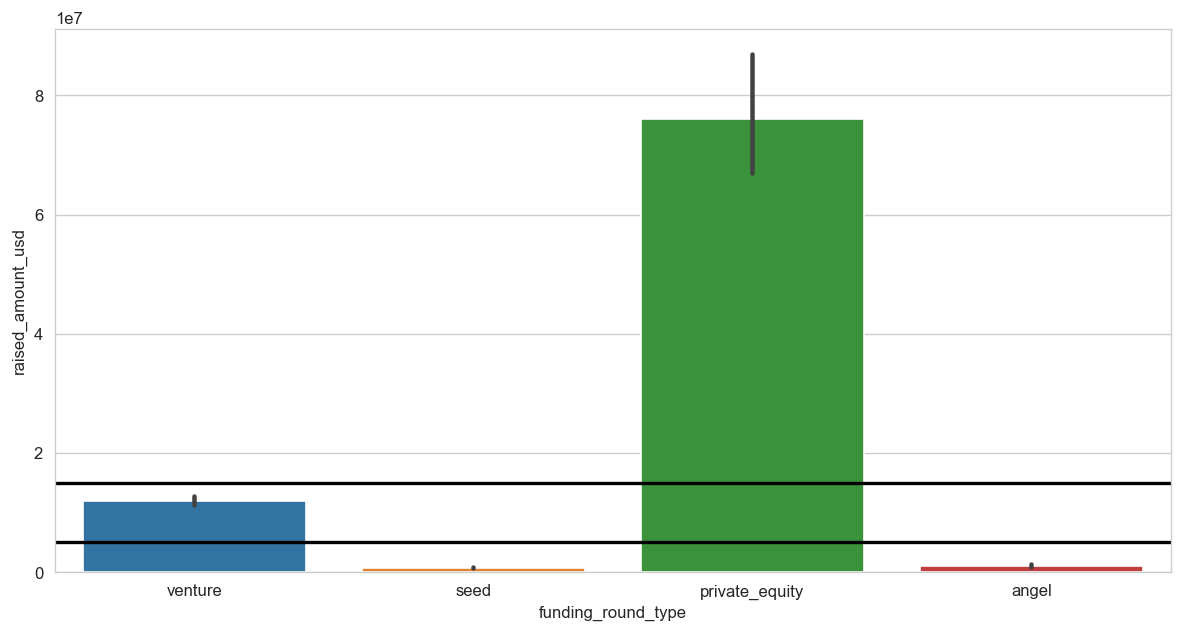

In [75]:
plt.figure(figsize=(12, 6),dpi=120,frameon=True)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [81]:
#check the raised amount in USD in Millians
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000, 4)

funding_round_type
angel              0.9972
private_equity    75.9760
seed               0.7633
venture           11.8940
Name: raised_amount_usd, dtype: float64

We got mean amounts for funding types. Based on this, below are the answers.


| Sl. No | Questions | Answer |
| ------ | --------- | ------ |
|1|Representative funding amount of venture type | 11.89 Million Dollars |
|2|Representative funding amount of angel type | 0.99 Million Dollars |
|3|Representative funding amount of seed type | 0.76 Million Dollars |
|4|Representative funding amount of private equity type | 75.97 Million Dollars |
|5|Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? | **Venture**|

We have completed our second checklists.


## Checklist 3 - Country Analysis

We need to analyze country here. Below are questions which we will address - 
1. Top English speaking country
2. Second English speaking country
3. Third English speaking country


In [84]:
#We have checked that Spark will invest in Ventures because it's mean raised amount is between 5 to 15 millian.
#Hence we will drop other investment type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.shape

(44748, 8)

In [85]:
#Get top 9 countries from this dataset
top9 = master_frame.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending = False).reset_index().head(9)
top9

,country_code,raised_amount_usd
0,USA,3.983246e+11
1,CHN,3.864227e+10
2,GBR,1.814229e+10
3,IND,1.392025e+10
4,CAN,8.747168e+09
5,FRA,6.742609e+09
6,ISR,6.484357e+09
7,DEU,6.021103e+09
8,JPN,3.156202e+09


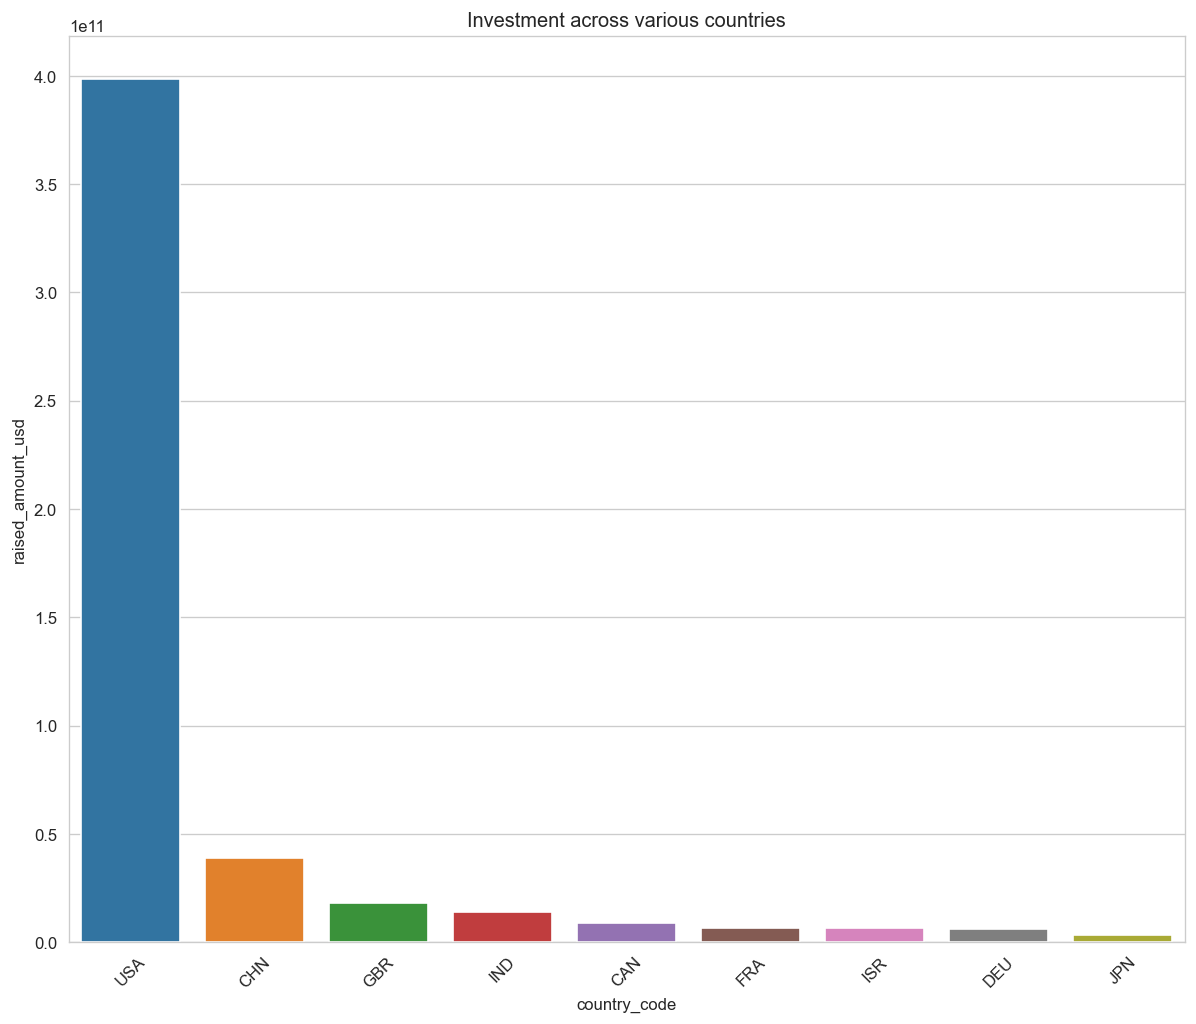

In [92]:
plt.figure(figsize = (12,10),dpi=120,frameon=True)
plt.title('Investment across various countries')
sns.barplot(x='country_code', y="raised_amount_usd", data=top9, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

We found top 5 countries which are **United States**, **China**, **Great Britain**, **India** & **CAN**, Out of which China does not speaks english. SO we can consider USA, GBR and IND.

[Reference](https://en.wikipedia.org/wiki/English-speaking_world)

|Sl.No|	Questions|	Answers|
|-|-|--|
|1|	Top English speaking country	|USA|
|2|	Second English speaking country	|GBR|
|3|	Third English speaking country	|IND|

We have completed our third checklist here.

## Checklist 4 - Sector Analysis 1

We will analyze sector dataset here

In [97]:
# SparksFunds wants to invest in only top three English speaking countries, we will retain only USA, GBR AND IND
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
master_frame.shape

(36307, 8)

In [98]:
master_frame.category_list.value_counts()

Biotechnology                                                4337
Software                                                     2987
Health Care                                                  1121
Enterprise Software                                           964
Clean Technology                                              957
                                                             ... 
Food Processing|Healthcare Services|Nutrition                   1
Analytics|Mobile|Retail|Tracking                                1
Curated Web|Online Dating|Social Network Media                  1
E-Commerce Platforms|Social Commerce|Social Media               1
Apps|Health Diagnostics|IT Management|Networking|Software       1
Name: category_list, Length: 7364, dtype: int64

Some category has '|' in name. We have to extract first part. We can do this using `lambda` notation or `apply`
We are going to use `apply` notations

In [104]:
def extractCat(string):
    separated = string.split("|")
    return separated[0]
    

master_frame['primary_sector'] = master_frame['category_list'].apply(extractCat)
master_frame.head(10)
master_frame.primary_sector.unique()

array(['Media', 'Analytics', 'Apps', 'Education', 'Curated Web',
       'Health Care', 'Software', 'Biotechnology', 'Service Providers',
       'Manufacturing', 'Advertising', 'Internet', 'Health and Wellness',
       'E-Commerce', 'News', 'Art', 'Big Data', 'EdTech', 'Computers',
       'Clean Technology', 'Cloud Computing', 'Hardware + Software',
       'Internet of Things', 'Cloud Infrastructure', 'Messaging',
       'Information Technology', 'Consumer Electronics', 'Data Centers',
       'Android', 'Customer Service', 'Enterprise Software',
       '3D Technology', '3D', 'Drones', '3D Printing', 'Automated Kiosk',
       'Music', 'Web Hosting', 'Cloud Data Services', 'Consulting',
       'Physical Security', 'Security', 'Databases', 'Flash Storage',
       'Machine Learning', 'Commercial Real Estate',
       'Anything Capital Intensive', 'Automotive', 'Ad Targeting',
       'Office Space', 'Online Shopping', 'Mobile', 'Games', 'Accounting',
       'B2B', 'Nanotechnology', 'Content C

In [105]:
mapping = pd.read_csv('mapping.csv')
mapping.shape

(688, 10)

Above data is in long format. Only some columns have values, rest are all set as zero, which does not seems right to analyze.
We can convert his wide format to long using panda `melt` functions. We need to find index variables and value variables.
Index variables are those which represent indexes, or category for row, and value variable is name which contains value for that category.

In [107]:
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [108]:
mapping_df = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars)
mapping_df.shape

(6192, 3)

In [110]:
mapping_df.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [113]:
mapping_df = mapping_df[mapping_df['value']==1]
mapping_df = mapping_df.drop('value', axis=1)
mapping_df.head(10)

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


In [115]:
#change the name of the column
mapping_df = mapping_df.rename(columns={'variable': 'main_sector'})

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [116]:
#merge mapping data to master frame
master_frame = master_frame.merge(mapping_df, how = 'left', left_on ='primary_sector', right_on="category_list")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,Apps,"News, Search and Messaging"


In [117]:
master_frame.main_sector.value_counts()

Others                                     8453
Cleantech / Semiconductors                 7829
Social, Finance, Analytics, Advertising    5219
News, Search and Messaging                 4282
Health                                     3228
Manufacturing                              2457
Entertainment                              1775
Automotive & Sports                         550
Name: main_sector, dtype: int64

We have completed forth checklist.

## Checklist 5 - Sector Analysis 2

We have to figure below points here
1. Total number of Investments (count)
2. Total amount of investment (USD)
3. Top Sector name (no. of investment-wise)
3. Second Sector name (no. of investment-wise)
4. Third Sector name (no. of investment-wise)
5. Number of investments in top sector (3)
6. Number of investments in second sector (4)
7. Number of investments in third sector (5)
8. For point 3 (top sector count-wise), which company received the highest investment?
9. For point 4 (second best sector count-wise), which company received the highest investment?

In [118]:
# We are first fetching data for USA country
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]

In [119]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,H2O.ai,Analytics,operating,USA,Analytics,NaN,NaN
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,Apps,"News, Search and Messaging"
16,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.0,128 Technology,Service Providers|Technology,operating,USA,Service Providers,Service Providers,Others
19,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15000000.0,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,Manufacturing
20,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,5000000.0,1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,Manufacturing


In [122]:
D1_agg = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D1_agg = D1_agg.droplevel(axis=1, level=[0]).reset_index()
D1_agg

,main_sector,Total_amount,Total_count
0,Automotive & Sports,1.374304e+09,157
1,Cleantech / Semiconductors,1.972990e+10,2145
2,Entertainment,4.503765e+09,520
3,Health,7.733830e+09,853
4,Manufacturing,6.700079e+09,739
5,"News, Search and Messaging",1.281416e+10,1445
6,Others,2.441447e+10,2732
7,"Social, Finance, Analytics, Advertising",1.590572e+10,1813


In [127]:
D1 = D1.merge(D1_agg, how='left', on ='main_sector')
D1.head()
print(D1.raised_amount_usd.count())
print(round(D1.raised_amount_usd.sum()))

11287
101010153708


In [134]:
#For Great britain
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]

In [130]:
# group by main sector and get sum and count of raised_amount_usd
D2_agg = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D2_agg = D2_agg.droplevel(axis=1, level=[0]).reset_index()
D2_agg

,main_sector,Total_amount,Total_count
0,Automotive & Sports,1.670516e+08,16
1,Cleantech / Semiconductors,1.028029e+09,114
2,Entertainment,4.422411e+08,51
3,Health,2.025375e+08,23
4,Manufacturing,3.433243e+08,40
5,"News, Search and Messaging",5.585007e+08,66
6,Others,1.189442e+09,137
7,"Social, Finance, Analytics, Advertising",7.976084e+08,95


In [131]:
D2 = D2.merge(D2_agg, how='left', on ='main_sector')
D2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,Total_amount,Total_count
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,5500000.0,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,Android,"Social, Finance, Analytics, Advertising",7.976084e+08,95.0
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,8468328.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Content Creators,Entertainment,4.422411e+08,51.0
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,10000000.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Content Creators,Entertainment,4.422411e+08,51.0
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,4.422411e+08,51.0
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,4.422411e+08,51.0
5,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,8259067.0,Abcodia,Biotechnology,operating,GBR,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.028029e+09,114.0
6,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,10000000.0,Acacia Pharma,Biotechnology,operating,GBR,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.028029e+09,114.0
7,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,9910333.0,ACAL Energy,Clean Technology,operating,GBR,Clean Technology,Clean Technology,Cleantech / Semiconductors,1.028029e+09,114.0
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,10720178.0,Acal Enterprise Solutions,Information Technology,operating,GBR,Information Technology,Information Technology,"Social, Finance, Analytics, Advertising",7.976084e+08,95.0
9,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,8300000.0,Accent Media Limited,Domains|Internet|Ticketing,operating,GBR,Domains,Domains,"News, Search and Messaging",5.585007e+08,66.0


In [133]:
print(D2.raised_amount_usd.count())
print(round(D2.raised_amount_usd.sum()))

582
5053293406


In [135]:
#For India
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
# group by main sector and get sum and count of raised_amount_usd
D3_agg = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
#drop level so that it can be merged with main data
D3_agg = D3_agg.droplevel(axis=1, level=[0]).reset_index()
D3_agg

,main_sector,Total_amount,Total_count
0,Automotive & Sports,136900000.0,13
1,Cleantech / Semiconductors,165380000.0,20
2,Entertainment,272080000.0,32
3,Health,160740000.0,18
4,Manufacturing,200900000.0,21
5,"News, Search and Messaging",408834545.0,49
6,Others,934289507.0,102
7,"Social, Finance, Analytics, Advertising",290543500.0,32


In [136]:
D3 = D3.merge(D3_agg, how='left', on ='main_sector')
D3.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,Total_amount,Total_count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment,272080000.0,32.0
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,E-Commerce,E-Commerce,Others,934289507.0,102.0
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,6410000.0,A LITTLE WORLD,Finance,operating,IND,Finance,NaN,NaN,NaN,NaN
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,8180000.0,Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment,Entertainment,272080000.0,32.0
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,5740000.0,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,NaN,NaN,NaN,NaN
5,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,5000000.0,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,Consumer Internet,Consumer Internet,"Social, Finance, Analytics, Advertising",290543500.0,32.0
6,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,5500000.0,Amagi Media Labs,Advertising,operating,IND,Advertising,Advertising,"Social, Finance, Analytics, Advertising",290543500.0,32.0
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,5000000.0,Ameyo,Software,operating,IND,Software,Software,Others,934289507.0,102.0
8,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,5000000.0,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,Automotive,Automotive,Automotive & Sports,136900000.0,13.0
9,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,5000000.0,Annapurna Microfinace,Finance,operating,IND,Finance,NaN,NaN,NaN,NaN


In [137]:
print(D3.raised_amount_usd.count())
print(round(D3.raised_amount_usd.sum()))

315
2820673602


In [138]:
#Sorting each aggregate dataframe

D1_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,2.441447e+10,2732
1,Cleantech / Semiconductors,1.972990e+10,2145
7,"Social, Finance, Analytics, Advertising",1.590572e+10,1813
5,"News, Search and Messaging",1.281416e+10,1445
3,Health,7.733830e+09,853
4,Manufacturing,6.700079e+09,739
2,Entertainment,4.503765e+09,520
0,Automotive & Sports,1.374304e+09,157


In [139]:
D2_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,1.189442e+09,137
1,Cleantech / Semiconductors,1.028029e+09,114
7,"Social, Finance, Analytics, Advertising",7.976084e+08,95
5,"News, Search and Messaging",5.585007e+08,66
2,Entertainment,4.422411e+08,51
4,Manufacturing,3.433243e+08,40
3,Health,2.025375e+08,23
0,Automotive & Sports,1.670516e+08,16


In [140]:
D3_agg.sort_values("Total_count",ascending=False)

,main_sector,Total_amount,Total_count
6,Others,934289507.0,102
5,"News, Search and Messaging",408834545.0,49
2,Entertainment,272080000.0,32
7,"Social, Finance, Analytics, Advertising",290543500.0,32
4,Manufacturing,200900000.0,21
1,Cleantech / Semiconductors,165380000.0,20
3,Health,160740000.0,18
0,Automotive & Sports,136900000.0,13


In [143]:
#For D1 dataframe second top is "Cleantech / Semiconductors"
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/biodesix         75300000.0
/organization/tigo-energy      68739496.0
/organization/forsight-labs    61300001.0
/organization/rheonix          56124758.0
/organization/scienergy        55375423.0
Name: raised_amount_usd, dtype: float64

In [144]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/intacct         61800000.0
/organization/lotame          59700000.0
/organization/choicestream    58300000.0
/organization/damballa        55000000.0
/organization/zoove           54800000.0
Name: raised_amount_usd, dtype: float64

In [145]:
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
Name: raised_amount_usd, dtype: float64

In [146]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/imagini                  28550000.0
/organization/sumup                    24293649.0
/organization/amplience                24200000.0
Name: raised_amount_usd, dtype: float64

In [147]:
D3[D3['main_sector']=='News, Search and Messaging'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/roadrunnr                           21000000.0
/organization/hike                                21000000.0
Name: raised_amount_usd, dtype: float64

In [148]:
D3[D3['main_sector'].isin(['Entertainment','Social, Finance, Analytics, Advertising'])].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(5)

company_permalink
/organization/komli-media      28000000.0
/organization/shopclues-com    25000000.0
/organization/intarvo          21900000.0
/organization/yebhi            21000000.0
/organization/holidayiq-com    20000000.0
Name: raised_amount_usd, dtype: float64

In [149]:
D1_aggregate = D1_agg.sort_values("Total_count",ascending=False).head(4).reset_index()
D1_aggregate["country"] = "USA";
D2_aggregate = D2_agg.sort_values("Total_count",ascending=False).head(4).reset_index()
D2_aggregate["country"] = "GBR";
D3_aggregate = D3_agg.sort_values("Total_count",ascending=False).head(5).reset_index()
D3_aggregate["country"] = "IND";

In [151]:
final_aggregate = pd.merge(pd.merge(D1_aggregate, D2_aggregate, how='outer'), D3_aggregate, how='outer')
final_aggregate

,index,main_sector,Total_amount,Total_count,country
0,6,Others,2.441447e+10,2732,USA
1,1,Cleantech / Semiconductors,1.972990e+10,2145,USA
2,7,"Social, Finance, Analytics, Advertising",1.590572e+10,1813,USA
3,5,"News, Search and Messaging",1.281416e+10,1445,USA
4,6,Others,1.189442e+09,137,GBR
5,1,Cleantech / Semiconductors,1.028029e+09,114,GBR
6,7,"Social, Finance, Analytics, Advertising",7.976084e+08,95,GBR
7,5,"News, Search and Messaging",5.585007e+08,66,GBR
8,6,Others,9.342895e+08,102,IND
9,5,"News, Search and Messaging",4.088345e+08,49,IND


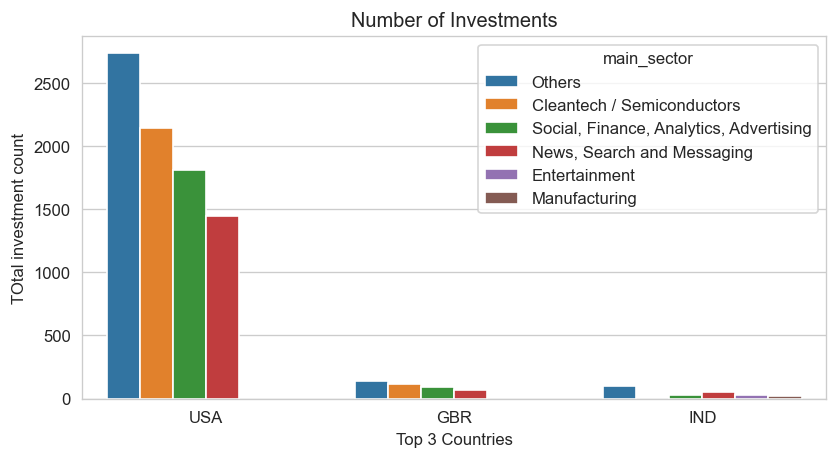

In [153]:
#Plot barplot against country and total count
plt.figure(figsize=[8.0,4.0],dpi=120,frameon=True)
sns.barplot(x='country', y='Total_count', hue='main_sector',data = final_aggregate)
plt.ylabel("TOtal investment count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments") 
plt.show()